In [78]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

## Introducing Principal Component Analysis

Principal component analysis is a fast and flexible unsupervised method for dimensionality reduction in data, which we saw briefly in [Introducing Scikit-Learn](05.02-Introducing-Scikit-Learn.ipynb).
Its behavior is easiest to visualize by looking at a two-dimensional dataset.
Consider the following 200 points, obtained by multiplying a random 2x2 matrix with a random 2x200 matrix.

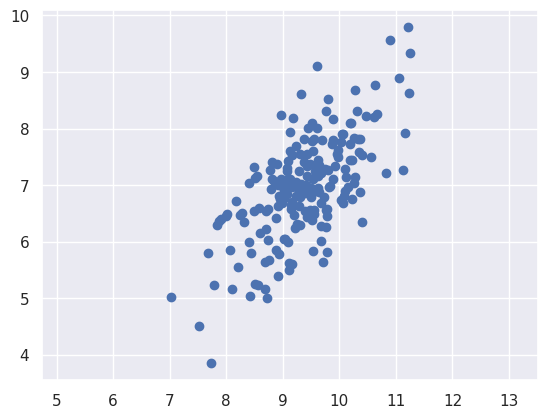

In [79]:
rng = np.random.RandomState(10)
X = np.dot(rng.rand(2, 2), rng.randn(2, 200))
mean = rng.rand(2,1)
X = X + 10*mean
plt.scatter(X[0], X[1])
plt.axis('equal');

By eye, it is clear that there is a nearly linear relationship between the x and y variables.
This is reminiscent of the linear regression, but the problem setting here is slightly different: rather than attempting to *predict* the y values from the x values, the unsupervised learning problem attempts to learn about the *relationship* between the x and y values.

In principal component analysis, this relationship is quantified by finding a list of the *principal axes* in the data, and using those axes to describe the dataset.
Using Scikit-Learn's ``PCA`` estimator, we can compute this as follows:

In [80]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
pca.fit(X.T)


PCA(n_components=2)

The fit learns some quantities from the data, most importantly the "components" and "explained variance". The "components" are the eigen vectors and the explained variance is the variance along the corresponding directions.

In [81]:
print("eigen vectors =", pca.components_)

eigen vectors = [[-0.60247767 -0.79813574]
 [ 0.79813574 -0.60247767]]


In [82]:
print("eigen vectors =",pca.explained_variance_)

eigen vectors = [1.16916171 0.22345098]


To see what these numbers mean, let's visualize them as vectors over the input data, using the "components" to define the direction of the vector, and the "explained variance" to define the squared-length of the vector:

[1.1691617099907696, array([-0.60247767, -0.79813574])]
[0.223450978805445, array([ 0.79813574, -0.60247767])]


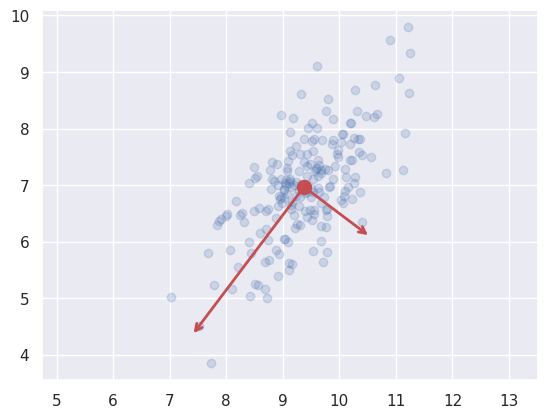

In [83]:
def draw_vector(v0, v1, ax=None):
    ax = ax or plt.gca()
    arrowprops=dict(arrowstyle='->',
                    linewidth=2,
                    shrinkA=0, shrinkB=0,color='r')
    ax.annotate('', v1, v0, arrowprops=arrowprops)

# plot data
plt.scatter(X[0], X[1], alpha=0.2)
for length, vector in zip(pca.explained_variance_, pca.components_):
    v = vector * 3 * np.sqrt(length)
    print([length, vector])
    draw_vector(pca.mean_, pca.mean_ + v)
plt.plot(pca.mean_[0],pca.mean_[1],marker='o',color='r',markersize=10)
plt.axis('equal');

This transformation from data axes to principal axes is an *affine transformation*, which basically means it is composed of a translation, rotation, and uniform scaling.

While this algorithm to find principal components may seem like just a mathematical curiosity, it turns out to have very far-reaching applications in the world of machine learning and data exploration.

# Implement PCA yourself

<font color=red> Your code below </font>

[1.1691617099907696, array([-0.60247767, -0.79813574])]
[0.22345097880544507, array([-0.79813574,  0.60247767])]


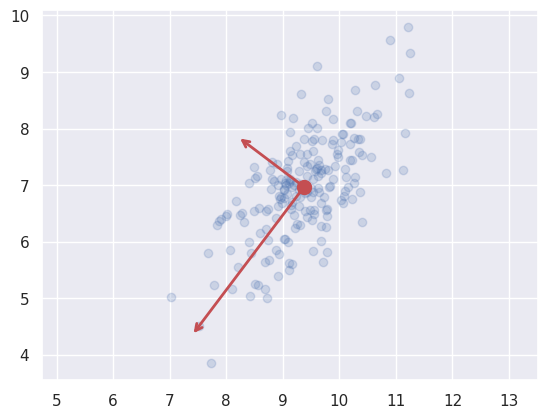

In [84]:

# Compute and subtract the mean
Xmean = np.mean(X, axis=1)
x_centered = X - Xmean[:, np.newaxis]

#Compute the covariance matrix
cov_matrix = np.cov(x_centered)

# Perform eigen decomposition
eigval, eigvec = np.linalg.eig(cov_matrix)
eigval = np.flip(eigval, 0)

# Plot the eigen values and eigen vectors
# plt.scatter(X[0], X[1], alpha=0.2)
# for i in range(0,2):
#     length = np.sqrt(eigval[i])
#     v = eigvec[:,i]
#     ax = plt.gca()
#     arrowprops=dict(arrowstyle='->',linewidth=2, shrinkA=0, shrinkB=0,color='r')
#     ax.annotate('', 0.2*length*v+np.squeeze(Xmean),np.squeeze(Xmean), arrowprops=arrowprops)
# plt.plot(Xmean[0],Xmean[1],marker='o',color='r',markersize=10)
# plt.axis('equal');
plt.scatter(X[0], X[1], alpha=0.2)
for length, vector in zip(eigval, eigvec):
    vector = np.flip(vector, 0)
    print([length, vector])
    v = vector * 3 * np.sqrt(length)
    draw_vector(pca.mean_, pca.mean_ + v)
plt.plot(pca.mean_[0],pca.mean_[1],marker='o',color='r',markersize=10)
plt.axis('equal');

### PCA as dimensionality reduction

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform:

In [85]:
pca = PCA(n_components=1)
pca.fit(X)
X_pca = pca.transform(X)
print("original shape:   ", X.shape)
print("transformed shape:", X_pca.shape)

original shape:    (2, 200)
transformed shape: (2, 1)


The transformed data has been reduced to a single dimension.
To understand the effect of this dimensionality reduction, we can perform the inverse transform of this reduced data and plot it along with the original data:

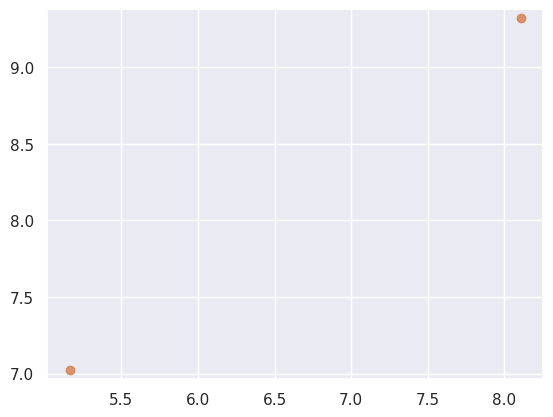

In [86]:
X_new = pca.inverse_transform(X_pca)
plt.scatter(X[:, 0], X[:, 1], alpha=0.2)
plt.scatter(X_new[:, 0], X_new[:, 1], alpha=0.8)
plt.axis('equal');

The light points are the original data, while the dark points are the projected version.
This makes clear what a PCA dimensionality reduction means: the information along the least important principal axis or axes is removed, leaving only the component(s) of the data with the highest variance.
The fraction of variance that is cut out (proportional to the spread of points about the line formed in this figure) is roughly a measure of how much "information" is discarded in this reduction of dimensionality.

This reduced-dimension dataset is in some senses "good enough" to encode the most important relationships between the points: despite reducing the dimension of the data by 50%, the overall relationship between the data points are mostly preserved.

### PCA for visualization: Hand-written digits

The usefulness of the dimensionality reduction may not be entirely apparent in only two dimensions, but becomes much more clear when looking at high-dimensional data.
To see this, let's take a quick look at the application of PCA to a digits dataset in scikit learn. This is different from MNIST and consists of 8x8 digits. We start by loading the data:

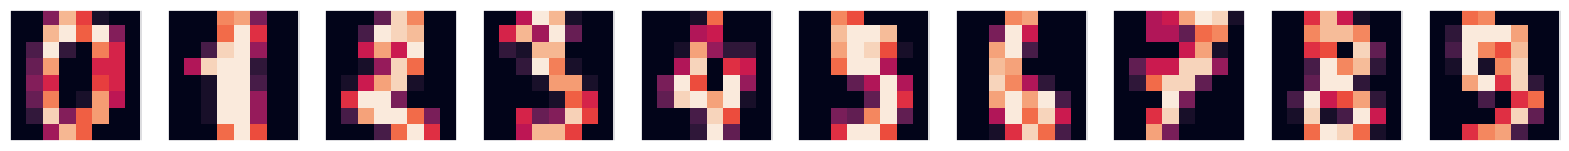

In [87]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

fig,ax = plt.subplots(1,10,figsize=(20,2))
for i in range(10):
  ax[i].imshow(np.reshape(digits.data[i],(8,8)))
  ax[i].get_xaxis().set_visible(False)
  ax[i].get_yaxis().set_visible(False)

Recall that the data consists of 8×8 pixel images, meaning that they are 64-dimensional.
To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

In [88]:
pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print(digits.data.shape)
print(projected.shape)

(1797, 64)
(1797, 2)


We can now plot the first two principal components of each point to learn about the data:

<ipython-input-89-dd9b33e5d9b7>:3: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap=plt.cm.get_cmap('prism_r', 10))


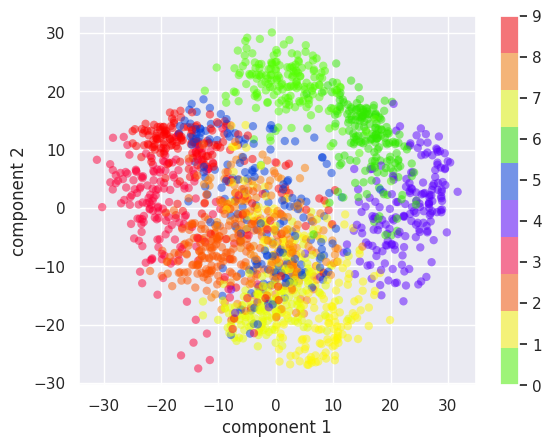

In [89]:
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('prism_r', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance.
Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

# TODO: Reconstruct from the projections


<font color=red>Reconstruct the approximate images from the projections and display them. </font>

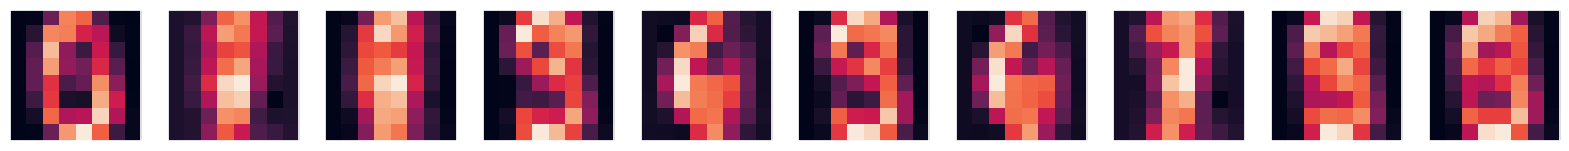

In [90]:
# YOUR CODE BELOW
reconstructed = pca.inverse_transform(projected)
fig,ax = plt.subplots(1,10,figsize=(20,2))
for i in range(10):
  ax[i].imshow(np.reshape(reconstructed[i,:],(8,8)))
  ax[i].get_xaxis().set_visible(False)
  ax[i].get_yaxis().set_visible(False)